<a href="https://colab.research.google.com/github/Henil21/PyTorch/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Oct  8 07:45:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
print(torch.__version__)


2.4.1+cu121




---



##Introduction to tensor🤝
### Creating tensors


>💡 A scalar is a single number and in tensor-speak it's a zero dimension tensor.

In [3]:
# Scaler
scaler=torch.tensor(7)
scaler

tensor(7)

In [4]:
scaler.ndim
# return dimensions

0

In [5]:
scaler.item()
# returns an python int

7

A vector is a single dimension tensor but can contain many numbers.

```As in, you could have a vector [3, 2] to describe [bedrooms, bathrooms] in your house. Or you could have [3, 2, 2] to describe [bedrooms, bathrooms, car_parks] in your house.```

The important trend here is that a vector is flexible in what it can represent (the same with tensors).

In [6]:
# vector
vector=torch.tensor([7,7])
print(vector)
print(vector.ndim)
print(vector.shape )

tensor([7, 7])
1
torch.Size([2])


In [7]:
# MATRIX
MATRIX=torch.tensor([[7,8],
                     [9,10]])
print(MATRIX)
print(MATRIX.ndim) #2d matrix
print(MATRIX.shape)

tensor([[ 7,  8],
        [ 9, 10]])
2
torch.Size([2, 2])


In [8]:
print(f'first dimension is {MATRIX[0]}')
print(f'second dimension is {MATRIX[1]}')

first dimension is tensor([7, 8])
second dimension is tensor([ 9, 10])


In [9]:
TENSOR=torch.tensor([[[1,2,3],
                      [4,5,6],
                      [7,8,9]]])
TENSOR
# this tensor are fundamental bilding block of nn

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [10]:
print(TENSOR.ndim)
TENSOR.shape

3


torch.Size([1, 3, 3])

In [11]:
TENSOR[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-pytorch-different-tensor-dimensions.png">



---



### Random Tensor ▶


We've established tensors represent some form of data.

And machine learning models such as neural networks manipulate and seek patterns within tensors.

But when building machine learning models with PyTorch, it's rare you'll create tensors by hand (like what we've been doing).

Instead, a machine learning model often starts out with large random tensors of numbers and adjusts these random numbers as it works through data to better represent it.

In essence:

>**⚡ Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers...**

> As a data scientist, you can define how the machine learning model starts (initialization), looks at data (representation) and updates (optimization) its random numbers.

We'll get hands on with these steps later on.

For now, let's see how to create a tensor of random numbers.

We can do so using `torch.rand()` and passing in the size parameter.

In [12]:
random_tensor=torch.rand(3,4) #size of (3,4)
random_tensor

tensor([[0.2659, 0.8671, 0.2610, 0.9470],
        [0.9767, 0.8934, 0.1032, 0.1769],
        [0.3755, 0.1686, 0.5400, 0.3493]])



---



The flexibility of `torch.rand()` is that *we can adjust the size to be whatever we want.*

For example, say **you wanted a random tensor in the common image shape of** `[224, 224, 3] ([height, width, color_channels]).`

In [13]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)



---



**This happens a lot with masking (like masking some of the values in one tensor with zeros to let a model know not to learn them).**

Let's create a tensor full of zeros with `torch.zeros()`

In [14]:
# Creating a tensor of all zeros
zero=torch.zeros(size=(3,4))
zero

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [15]:
zero.dtype

torch.float32

### Creating a range of tensors and tensors like.🪞

In [16]:
torch.arange(0,10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
range=torch.arange(start=0,end=10,step=2)
range

tensor([0, 2, 4, 6, 8])

In [18]:
# Creating tensor like
ten_zeros=torch.zeros_like(input=range)
ten_zeros

tensor([0, 0, 0, 0, 0])

### Tensor datatypes ⬇

In [19]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # What device is your tensor on
                               requires_grad=False) # whether or not track gradients with this tensors operation

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

In [20]:
float_16_tensor=float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)


### Getting information from tensors
Once you've created tensors (or someone else or a PyTorch module has created them for you), you might want to get some information from them.

We've seen these before but three of the most common attributes you'll want to find out about tensors are:

* shape - what shape is the tensor? (some operations require specific shape rules)
* dtype - what datatype are the elements within the tensor stored in?
* device - what device is the tensor stored on? (usually GPU or CPU)
Let's create a random tensor and find out details about it.

In [21]:
# Let's create a random tensor and find out details about it.

# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.1074, 0.5449, 0.1170, 0.3039],
        [0.1411, 0.9447, 0.9873, 0.9306],
        [0.9796, 0.8402, 0.1688, 0.3605]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu




---



---



😆
> Note: When you run into issues in PyTorch, it's very often one to do with one of the three attributes above. So when the error messages show up, sing yourself a little song called "what, what, where":

* what shape are my tensors? what datatype are they and where are they stored? what shape, what datatype, where where where"



---



---



### Manipulating tensors (tensor operations)
In deep learning, data (images, text, video, audio, protein structures, etc) gets represented as tensors.

**A model learns by investigating those tensors and performing a series of operations (could be 1,000,000s+) on tensors to create a representation of the patterns in the input data.**

These operations are often a wonderful dance between:

* Addition
* Substraction
* Multiplication (element-wise)
* Division
* Matrix multiplication


And that's it. Sure there are a few more here and there but these are the basic building blocks of neural networks.

Stacking these building blocks in the right way, you can create the most sophisticated of neural networks (just like lego!).

In [34]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
print(f"addition {tensor + 10}")
# Multiply it by 10
print(f"Multiplication {tensor * 10}")
# Divide it by 10
print(f'division {tensor / 10}')


addition tensor([11, 12, 13])
Multiplication tensor([10, 20, 30])
division tensor([0.1000, 0.2000, 0.3000])




---




### Matrix multiplication (is all you need)

One of the most common operations in machine learning and deep learning algorithms (like neural networks) is matrix multiplication.

PyTorch implements matrix multiplication functionality in the torch.matmul() method.

The main two rules for matrix multiplication to remember are:

The inner dimensions must match:

(3, 2) @ (3, 2) won't work

(2, 3) @ (3, 2) will work

(3, 2) @ (2, 3) will work


The resulting matrix has the shape of the outer dimensions:
(2, 3) @ (3, 2) -> (2, 2)

(3, 2) @ (2, 3) -> (3, 3)




> Note: "@" in Python is the symbol for matrix multiplication.

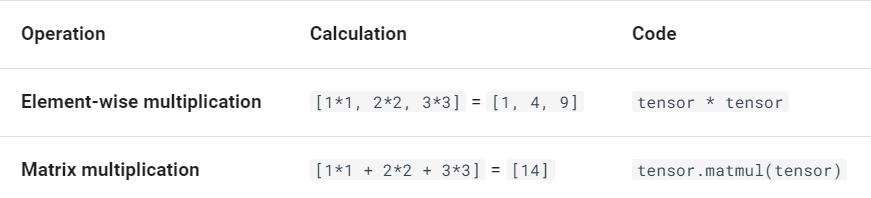

In [35]:

# Let's create a tensor and perform element-wise multiplication and matrix multiplication on it.
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

In [36]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [37]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

# **PyTorch Workflow Fundamentals ⚙**

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png">